# Градиентный спуск на NumPy

## Задание

**Цель**  
- Реализовать метод стохастического градиентного спуска на примере задачи логистической регрессии.


**Описание/Пошаговая инструкция выполнения домашнего задания**  
- Используя np.random научиться сэмплировать случайные точки из двумерного нормального распределения.  
- В качестве параметров двух разных нормальных распределений взять `mu_0 = (-1, -1)` и `mu_1 = (1, 1)`, с единичными дисперсиями.  
- Использовать функцию ошибки LogLoss.  
- Обучить модель на примерах из этих распределений "предсказывать" 0 и 1 соответственно для первого и второго распределений.  
- Используя библиотеку `matplotlib` нарисовать разделяющую поверхность.  
- Реализовать двухслойную нейронную сеть.  

## Импорт библиотек

In [1]:
import numpy as np

## Функция активации

In [2]:
# сигмоида
def sigmoid(z): 
    return 1. / (1 + np.exp(-z))

## Функции потерь

**Какие бывают функции потерь**

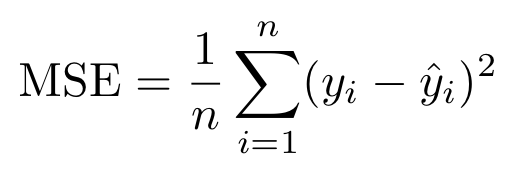

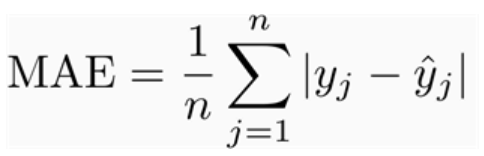

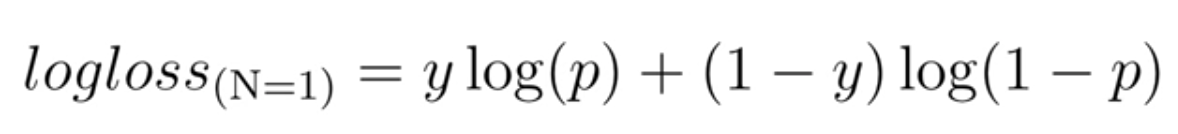

Logloss (она же бинарная кросс-энтропия) указан для двух классов (0 или 1). Для нескольких классов применяется просто кросс-энтропия.

In [3]:
# функция потерь (logloss)
def loss(t, y):
    return np.sum((t-y)**2)*0.5 # для двух точек (для упрощения)

# производная функции потерь
def diff_loss(t, y): 
    return np.sum(y - t)

## Слой сети

In [4]:
class Layer: 
    def __init__(self, n_inp, n_out, lr=0.01):      
        # кол-во входных и выходных нейронов
        self.shape = (n_inp, n_out) 
                
        # коэффициент скорости обучения (learning rate)
        self.lr = lr
        
        # инициализируем вектор весов нулями
        self.w = np.zeros(self.shape, dtype=np.float32) 
        
        # инициализируем bias (смещение) нулем
        self.b = np.zeros((1, n_out), dtype=np.float32) 
        
        # очищаем градиенты
        self._clear_grads()
    
    # функция очистки градиентов
    def _clear_grads(self): 
        self.inp = None
        self.activations = None
        self.d_sigma = None
        self.d_w = None
        self.d_b = None
    
    # функция прямого прохода
    def __call__(self, x): 
        if len(x.shape) == 1:
            x = x.reshape(1, -1)
        self.inp = x
        self.activations = sigmoid(x.dot(self.w) + self.b)
        return self.activations
    
    # функция обратного прохода
    def backward(self, grad): 
        # производная сигмоиды
        self.d_sigma = self.activations * (1 - self.activations) 
        
        self.d_w = self.grad_w(grad)
        self.d_b = self.grad_b(grad)
        
        return self.grad_x(grad)
    
    # функции вычисления градиентов
    def grad_w(self, grad): 
        return grad * self.inp.T * self.d_sigma

    def grad_b(self, grad):
        return grad * self.d_sigma

    def grad_x(self, grad):
        return self.w.dot(grad) * self.d_sigma
    
    # функция обновления весов
    def step(self): 
        self.w -= self.d_w * self.lr
        self.b -= self.d_b * self.lr
        self._clear_grads()

## Начальные данные

In [5]:
x1 = np.random.normal(loc=-1, scale=1, size=(5, 2))
t1 = np.zeros(5)

x2 = np.random.normal(loc=1, scale=1, size=(5, 2))
t2 = np.ones(5)

X = np.concatenate((x1, x2), axis=0)
t = np.concatenate((t1, t2), axis=0)
X, t

(array([[-3.11287819, -1.12494343],
        [-1.64550416, -0.31030953],
        [-1.6090908 , -2.35097178],
        [ 0.01136701,  0.54226447],
        [-1.94373049, -1.81135163],
        [-0.41899009,  0.35080377],
        [ 2.10978293,  0.48293938],
        [ 1.27950813,  0.80759087],
        [ 0.73412225,  2.08371669],
        [ 0.61132166,  1.4793156 ]]),
 array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

## Прямой ход

In [6]:
# первый слой нейронной сети (1 входных нейронов, 1 выходной)
l1 = Layer(10, 1) 

In [7]:
# начальный вектор весов
l1.w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [8]:
# начальный bias
l1.b 

array([[0.]], dtype=float32)